# Proyecto Integrador de Aprendizaje.
## Mineria de Datos.

Primero, se importan las librerias.

In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')

## Lectura de Datos.
Ahora leeremos los datos. Estos se encuentran en un .csv por lo que utilizaremos pandas para la lectura.

In [2]:
data=pd.read_csv('data.csv',encoding='latin')
data.head() #Mostramos los primeros 5 valores en nuestro csv.

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Comprobaremos con que tipos de datos estamos tratando.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Esto nos dice que estamos tratando con 4 columnas de tipo _float_ (es decir, con decimales), con 9 columnas de tipo _int_ (enteros) y con 5 de tipo objeto (Fechas, país, etcetera).

## Visualización de datos

Nos interesa observar una comparación entre el precio de las casas por pies cuadrados. Para esto, tomaremos estos valores de nuestra data.

In [4]:
data=data[['price','sqft_above']] #Para seleccionar esas columnas.
data=data.to_numpy()
x=data[:,np.newaxis,1] #a X le asignamos pies cuadrados y a Y le asignamos precio
y=data[:,np.newaxis,0]

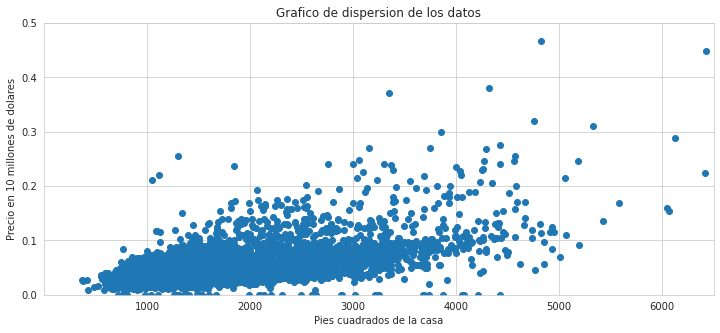

In [5]:
fig=plt.figure(figsize=(12,5))
plt.scatter(x, y/1e7) #mostramos la grafica de los datos
plt.title("Grafico de dispersion de los datos")
plt.xlabel("Pies cuadrados de la casa")
plt.ylabel("Precio en 10 millones de dolares")
plt.xlim(1,6500)
plt.ylim(0,0.5)
plt.show()

Esto nos muestra un histograma sobre los precios.

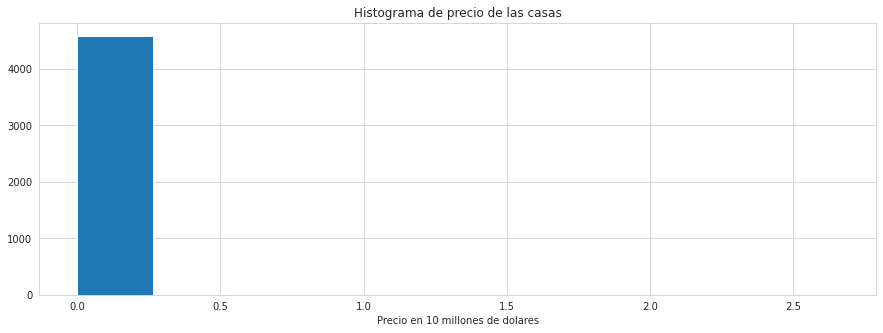

In [6]:
fig=plt.figure(figsize=(15,5))
plt.hist(y/1e7) #aqui esta el histograma de precios
plt.title("Histograma de precio de las casas")
plt.xlabel("Precio en 10 millones de dolares")
plt.show()

## Método de regresión lineal.

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
lr= linear_model.LinearRegression() #hacemos la regresion

lr.fit(xtrain,ytrain)

ypred=lr.predict(xtest)

Es hora de observar la regresión lineal.

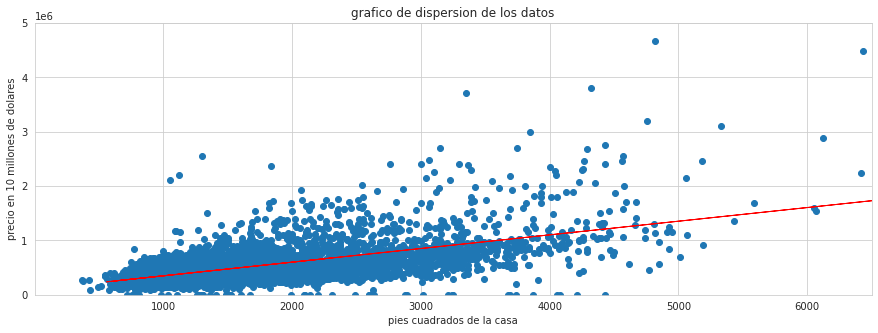

y= [[251.15737807]] ,x + [98019.43427703]
Eficiencia del modelo=  0.12457510590625198


In [8]:
fig=plt.figure(figsize=(15,5))
plt.scatter(x, y)# graficamos la linea recta de prediccion
plt.plot(xtest,ypred,color='red',linewidth=1)
plt.title("grafico de dispersion de los datos")
plt.xlabel("pies cuadrados de la casa")
plt.ylabel("precio en 10 millones de dolares")
plt.xlim(1,6500)
plt.ylim(0,0.5e7)
plt.show()
print("y=",lr.coef_,",x","+",lr.intercept_) #esta es la recta que dibujamos
print("Eficiencia del modelo= ",lr.score(xtrain,ytrain)) #esto es que tan bien predice la regrecion al modelo

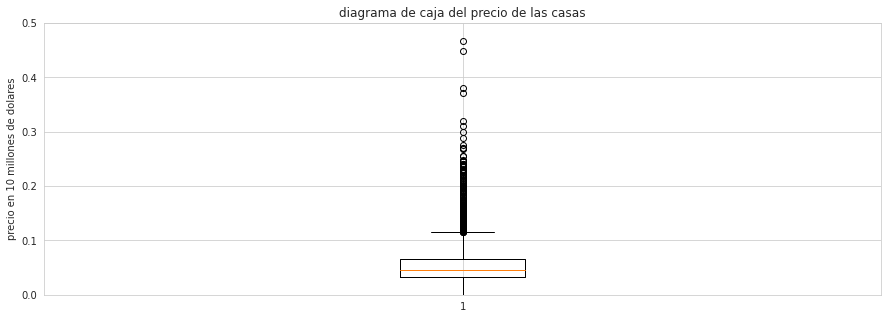

In [12]:
fig=plt.figure(figsize=(15,5))
plt.boxplot(y/1e7) #boxplot
plt.title("diagrama de caja del precio de las casas")
plt.ylabel("precio en 10 millones de dolares")
plt.ylim(0,0.5)
plt.show()

Ahora, observemos los valores de la media, varianza y desviacion.

In [22]:
tabla=[np.mean(y),np.var(y),np.std(y)]
datos=pd.Series(tabla,index=['Media','Varianza','Desviacion'])
datos=pd.DataFrame({'Valor':datos})
datos

,Valor
Media,5.519630e+05
Varianza,3.178405e+11
Desviacion,5.637734e+05
